In [1]:
!pip install nba_api

In [3]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict   

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dict_={'a':[11,21,31],'b':[12,22,32]}
dict_

{'a': [11, 21, 31], 'b': [12, 22, 32]}

In [7]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [9]:
df.mean()

a    21.0
b    22.0
dtype: float64

In [10]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [11]:
nba_teams = teams.get_teams()

In [12]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [13]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [14]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [15]:
id_warriors=df_warriors[['id']].values[0][0]
#we now have an integer that can be used   to request the Warriors information 
id_warriors

1610612744

In [16]:
from nba_api.stats.endpoints import leaguegamefinder

In [17]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)
gamefinder

In [19]:
#gamefinder.get_json()

In [20]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612744,GSW,Golden State Warriors,0022000286,2021-01-28,GSW @ PHX,L,241,93,...,0.750,12.0,36.0,48.0,21,8,1,13,19,-21.0
1,22020,1610612744,GSW,Golden State Warriors,0022000283,2021-01-27,GSW vs. MIN,W,240,123,...,0.783,11.0,35.0,46.0,32,11,5,21,28,12.0
2,22020,1610612744,GSW,Golden State Warriors,0022000266,2021-01-25,GSW vs. MIN,W,240,130,...,0.757,15.0,31.0,46.0,21,13,10,15,19,22.0
3,22020,1610612744,GSW,Golden State Warriors,0022000242,2021-01-23,GSW @ UTA,L,241,108,...,0.667,4.0,31.0,35.0,30,6,8,11,21,-19.0
4,22020,1610612744,GSW,Golden State Warriors,0022000228,2021-01-21,GSW vs. NYK,L,241,104,...,0.744,9.0,37.0,46.0,27,5,3,10,26,-15.0


In [27]:
games_home=games [games ['MATCHUP']=='GSW vs. TOR']
games_away=games [games ['MATCHUP']=='GSW @ TOR']

In [28]:
games_home.mean()['PLUS_MINUS']

3.2142857142857144

In [29]:
games_away.mean()['PLUS_MINUS']

-0.6071428571428571

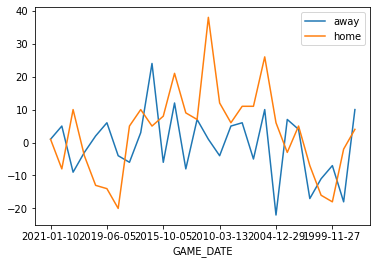

In [30]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

In [31]:
games_home.mean()['PTS']

games_away.mean()['PTS']

102.96428571428571

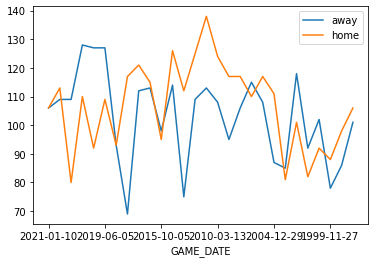

In [32]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PTS', ax=ax)
games_home.plot(x='GAME_DATE',y='PTS', ax=ax)
ax.legend(["away", "home"])
plt.show()